<a href="https://colab.research.google.com/github/luqmanmohdzaid/LuqmanLearningDataScience/blob/main/LSTM20_9_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory

Time series forecasting

Step 1: Load library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 2: Generate Time Series Data

In [ ]:
time = np.linspace( 0, 10 * np.pi, 1000) # 10 cycles of sine waves
y = np.sin(time)


Add some random Noise

In [ ]:
y += 0.1 * np.random.randn(1000)


Save data to a CSV File

In [ ]:
df = pd.DataFrame({'Time': time, "Value": y})
df.to_csv('time_series_data.csv', index = False)

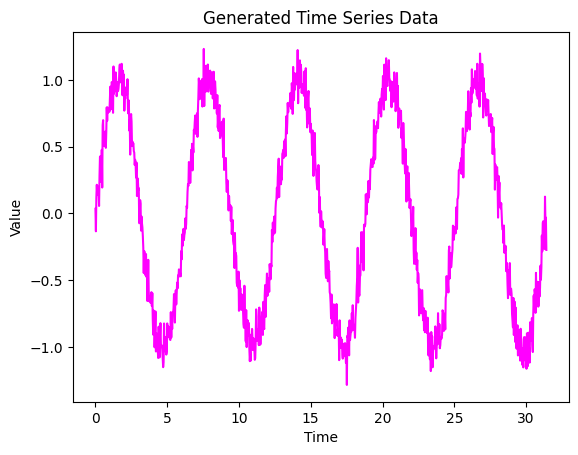

In [ ]:
plt.plot(time, y, color = 'magenta')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Generated Time Series Data')
plt.show()

Step 3: Load the Data in Collab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving time_series_data.csv to time_series_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['time_series_data.csv']))
y = df['Value'].values


In [ ]:
y

Step 4: Data Processing

In [ ]:
def create_sequence(data, sequence_length):
  xs, ys = [],[]
  for i in range (len(data)- sequence_length - 1):
    x = data[i:(i + sequence_length)]
    y = data[i + sequence_length]
    xs.append(x)
    ys.append(y)
  return np.array(xs), np.array(ys)



In [ ]:
sequence_length = 10
X, Y = create_sequence(y, sequence_length)

In [ ]:
X = X.reshape((X.shape[0], X.shape[1],1))

In [ ]:
X

Step 5: Build the LSTM

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential(([
    tf.keras.layers.LSTM(50, activation = 'relu', input_shape = (sequence_length, 1)),
    tf. keras.layers.Dense(1)
]))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')

Step 6: Train The Model

In [ ]:
history = model.fit(X, Y, epochs = 200, validation_split = 0.2)

Epoch 1/200
25/25 [==============================] - 2s 21ms/step - loss: 0.3266 - val_loss: 0.1641
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0786 - val_loss: 0.0317
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0236 - val_loss: 0.0235
Epoch 4/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0196 - val_loss: 0.0216
Epoch 5/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0191 - val_loss: 0.0217
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0184 - val_loss: 0.0216
Epoch 7/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0186 - val_loss: 0.0202
Epoch 8/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0176 - val_loss: 0.0194
Epoch 9/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0168 - val_loss: 0.0189
Epoch 10/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0163 - val_loss: 0.0182
Epoch 11

Step 7: **Evaluate and Forecast**

In [ ]:
y_pred = model.predict(X)


31/31 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[ 0.21988907],
       [ 0.30237433],
       [ 0.36529583],
       [ 0.39529765],
       [ 0.3806071 ],
       [ 0.43109304],
       [ 0.3745585 ],
       [ 0.4788821 ],
       [ 0.5776724 ],
       [ 0.58246416],
       [ 0.5822135 ],
       [ 0.61255133],
       [ 0.60849804],
       [ 0.63468194],
       [ 0.5663272 ],
       [ 0.6160987 ],
       [ 0.6165238 ],
       [ 0.6620251 ],
       [ 0.7554823 ],
       [ 0.7861847 ],
       [ 0.80749226],
       [ 0.8319333 ],
       [ 0.8229241 ],
       [ 0.8506655 ],
       [ 0.868724  ],
       [ 0.8570862 ],
       [ 0.88615304],
       [ 0.9063894 ],
       [ 0.931412  ],
       [ 0.93004596],
       [ 0.90004665],
       [ 0.92728466],
       [ 0.9194326 ],
       [ 0.9241861 ],
       [ 0.96141887],
       [ 0.9550725 ],
       [ 0.9733292 ],
       [ 0.9843768 ],
       [ 0.9777974 ],
       [ 0.9657016 ],
       [ 0.94615835],
       [ 0.9479268 ],
       [ 0.9376302 ],
       [ 0.93852204],
       [ 0.96828604],
       [ 0

In [ ]:
X

In [ ]:
Y

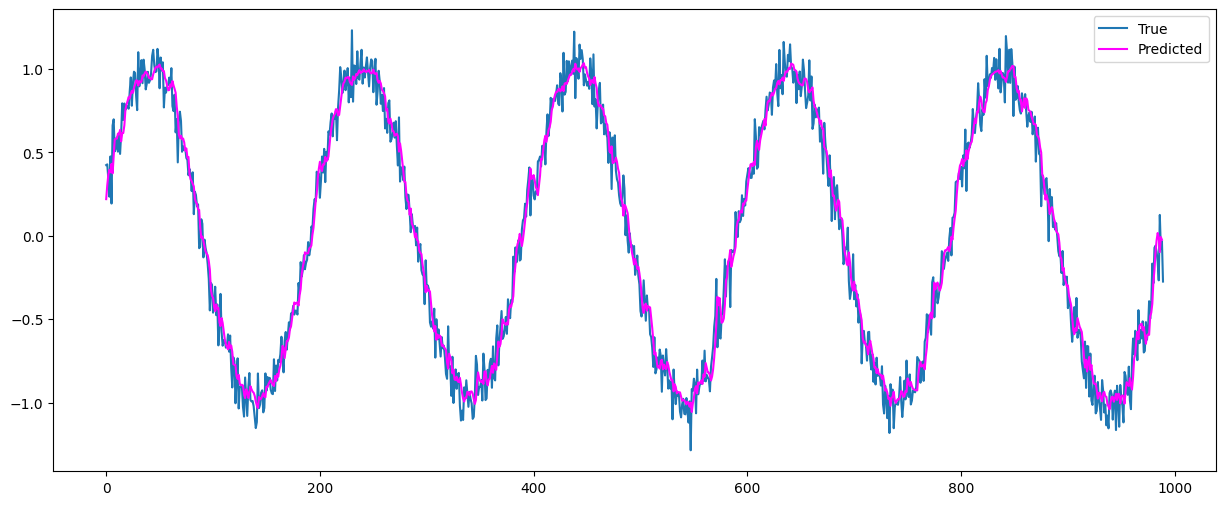

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(y[sequence_length:], label = 'True')
plt.plot(y_pred, label = 'Predicted', color = 'magenta')
#plt.plot(X)
plt.legend()
plt.show()